# Import the libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Load the dataset

In [128]:
df=pd.read_csv("revenue_prediction.csv")

In [129]:
df

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715
...,...,...,...,...,...,...,...,...
95,196,Wetzel'sPretzels,No,Italian/Pizza,Bengaluru,19,1.1,1270499
96,197,LaMadeleineCountryFrenchCafe,Yes,Varied Menu,Bengaluru,75,6.3,6412623
97,198,Giordano's,Yes,Varied Menu,Gurugram,77,6.2,6694797
98,199,IslandsFineBurgers&Drinks,Yes,Sports Bar,Pune,25,2.1,2344689


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   Name          100 non-null    object 
 2   Franchise     100 non-null    object 
 3   Category      100 non-null    object 
 4   City          100 non-null    object 
 5   No_Of_Item    100 non-null    int64  
 6   Order_Placed  100 non-null    float64
 7   Revenue       100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


# outliers detection

In [131]:
col_list=list(df.columns)

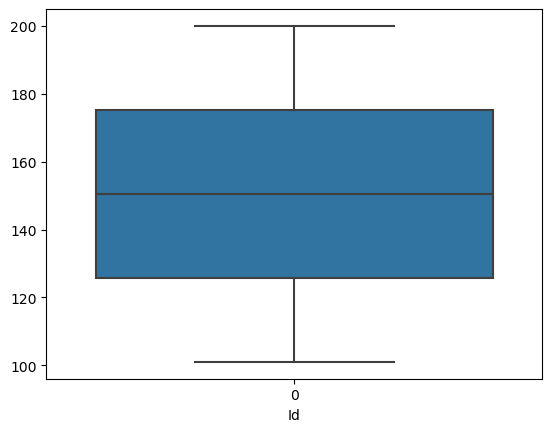

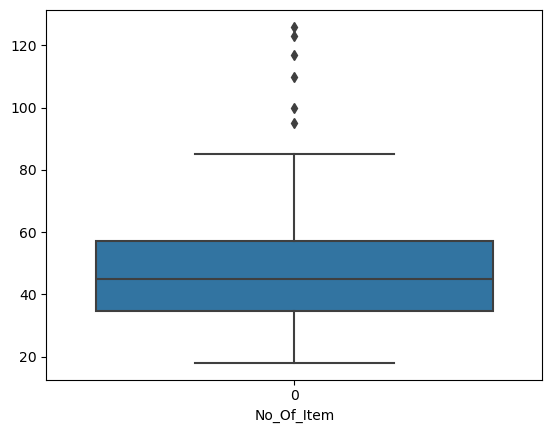

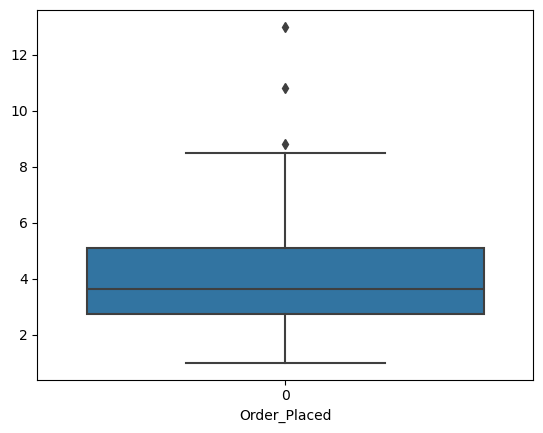

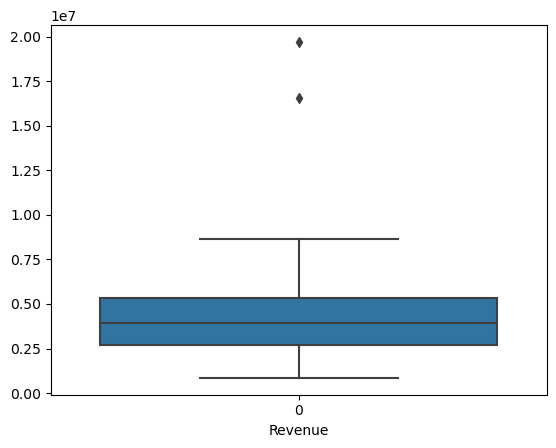

In [132]:
for i in col_list:
    if df[i].dtype != 'object':
        sns.boxplot(df[i])
        plt.xlabel(i)
        plt.show()

# Drop irrelevant columns

In [133]:
df.drop(columns=["Id","Name","Franchise","Category","City","No_Of_Item"],inplace=True)

In [134]:
df

,Order_Placed,Revenue
0,5.5,5953753
1,6.8,7223131
2,1.9,2555379
3,2.5,2175511
4,4.2,4816715
...,...,...
95,1.1,1270499
96,6.3,6412623
97,6.2,6694797
98,2.1,2344689


# splitting the model

In [135]:
from sklearn.model_selection import train_test_split


In [156]:
x=df.iloc[:,:-1].values

In [157]:
x

array([[ 5.5],
       [ 6.8],
       [ 1.9],
       [ 2.5],
       [ 4.2],
       [ 4.9],
       [ 5. ],
       [ 4.3],
       [ 4.8],
       [ 5.3],
       [ 3.6],
       [ 5. ],
       [ 1.6],
       [ 4.7],
       [ 1.8],
       [ 3.1],
       [10.8],
       [ 8.1],
       [ 5.2],
       [ 1.9],
       [ 5.4],
       [ 1. ],
       [ 3.8],
       [ 2.8],
       [ 8.8],
       [ 3.6],
       [ 2.1],
       [ 5.3],
       [ 4.6],
       [ 3.3],
       [ 2.9],
       [ 1.9],
       [ 3.1],
       [ 2.2],
       [ 4. ],
       [ 3.6],
       [ 2.8],
       [ 2.6],
       [ 5.3],
       [ 3.7],
       [ 6.7],
       [ 4.4],
       [ 4.8],
       [ 2.6],
       [ 4. ],
       [ 3.6],
       [ 4.1],
       [ 7.7],
       [ 7.1],
       [ 8.5],
       [ 1.9],
       [ 3.1],
       [ 1.6],
       [ 5.4],
       [ 4.5],
       [ 6.8],
       [ 2.1],
       [ 3.1],
       [ 2.9],
       [ 3.4],
       [ 3. ],
       [ 4.2],
       [ 5.1],
       [ 1.5],
       [ 2.4],
       [ 1.6],
       [ 1

In [162]:
y=df.iloc[:,-1].values

In [163]:
y


array([ 5953753,  7223131,  2555379,  2175511,  4816715,  4517319,
        5966635,  6491607,  5152497,  4544227,  3945135,  3861370,
        2234634,  5107746,  1099097,  3918918, 19696939,  7513524,
        4937526,  1521934,  5025735,   849870,  4956086,  1999068,
        7904084,  2778621,  2967425,  6135276,  7705945,  2447890,
        2408199,  2358644,  3261924,  2371202,  4100886,  3903884,
        3028267,  2740687,  5461700,  3818055,  6836483,  4554237,
        4952255,  2732645,  4264176,  3752885,  4250758,  7865428,
        7201784,  8630682,  2156098,  3273041,  1763231,  5595267,
        4651866,  6941173,  2390534,  3258837,  3004429,  3600467,
        3164972,  4350573,  5286212,  1619683,  2551252,  1756069,
        1882131,  4052733,  3836721,  3452382,  3982767,  4136425,
        2525375,  3347767,  5500818, 16549064,  4590423,  1904842,
        3871344,  6313221,  3727364,  4066618,  3807496,  5966193,
        4250553,  7495092,  3351383,  5906596,  2025297,  2364

In [165]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)


In [166]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

print(x_test.shape)

(80, 1)
(80,)
(20, 1)
(20, 1)


# Linear Regression

In [167]:
from sklearn.linear_model import LinearRegression

In [168]:
lr=LinearRegression()

In [169]:
lr.fit(x_train,y_train)

LinearRegression()

# predictions

In [170]:
predictions=lr.predict(x_test)

In [173]:
predictions,y_test

(array([6030438.98421109, 1719658.19499846, 4306126.66852604,
        1350162.69878024, 5291447.99177464, 5660943.48799286,
         611171.70634379, 1719658.19499846, 3690300.84149566,
        1965988.52581061, 3813466.00690174, 5907273.81880501,
        6153604.14961717, 1473327.86418631, 5291447.99177464,
        4059796.33771389, 3813466.00690174, 7385255.80367792,
        8124246.79611437, 3813466.00690174]),
 array([5025735, 2083447, 4100886, 1763231, 5152497, 5500818,  849870,
        2025297, 3727364, 2364478, 3807496, 5461700, 5953753, 1904842,
        4952255, 4052733, 3836721, 6782425, 7201784, 3945135], dtype=int64))

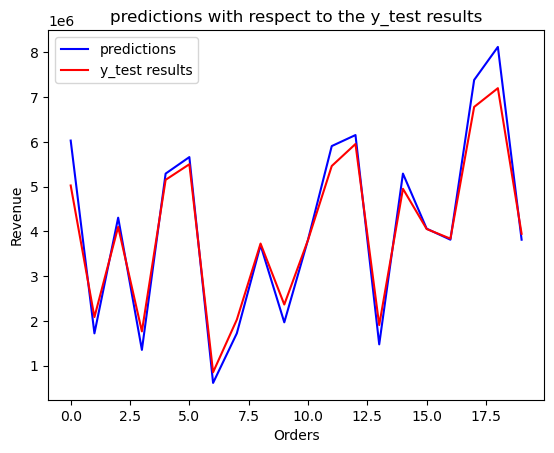

In [177]:
plt.plot(predictions,color="blue",label="predictions")
plt.plot(y_test,color="red",label="y_test results")
plt.xlabel("Orders")
plt.ylabel("Revenue")
plt.title("predictions with respect to the y_test results")
plt.legend()
plt.show()

# checking the accuracy of the model

In [184]:
from sklearn.metrics import r2_score

In [185]:
print(r2_score(predictions,y_test))

0.9597210697647443
